In [17]:
library(dplyr)
library("ggpubr")
samples<-read.csv("./labeled.csv")

# Experiment Description

## overview

In [ ]:
Running database(pgbench) workload on a AWS dedicated host.
That host can provision 16*c4.large VMs.
Each time only part of VMs work actively.
                  |VM1 |
                   ...
       |VM15| ... |VM15|
|VM16| |VM16| ... |VM16|
--------------------------> Time line
  set1  set2  ... set16.    Experiment name

## details

- Each _|VMx|_ block described on above time line consist of **3** runs.
- Thus, in the _.csv_ file **3** entries are labeled **set:=1**.
- Further more, **48** (=3\*16) entries are labeled by **vmID:=16**

Each entry of the _.csv_ file is generated by following command
> $pgbench --client=10 --jobs=10 --time=60  ubuntu

 '10 connections are created by 10 clients targeting to postgreSQL server'<br>
 'pgbench is going to use 1- threads to handle all connections if possible'<br>
 'pgbench will proceed performance test until the limit of 60 seconds'

# Analysis

## indicators of whole experiment

In [18]:
wholeExp = samples[,'transactions']
indicators=data.frame()
indicators<-rbind(indicators,c(range(wholeExp),mean(wholeExp),median(wholeExp)))
names(indicators)<-c('min','max','mean','median')
indicators

min,max,mean,median
52649,63657,57394.07,57167


### (max-min)/min

In [19]:
(indicators$max - indicators$min)/indicators$min



[1] 0.2090828

### mean && 95percentile

In [20]:
percentile=data.frame(quantile(samples$transactions,c(0.5,0.95)))
names(percentile) <- c('mean && 95percentile')
percentile

,mean && 95percentile
50%,57167.00
95%,61681.85


### Graph1 distribution

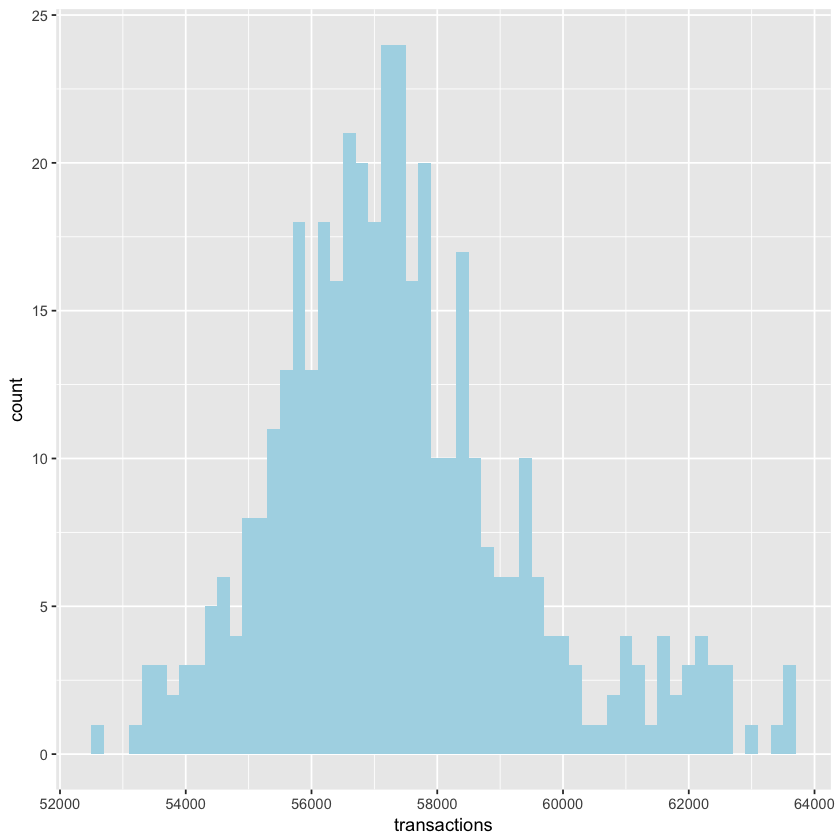

In [21]:
ggplot(samples, aes(x = transactions)) +
  geom_histogram(binwidth = 200, fill = "lightblue",)+
scale_x_continuous(breaks = scales::pretty_breaks()) +
scale_y_continuous(breaks = scales::pretty_breaks())

### brief summary

- If all the bars which have over 70,000 transactions are belongs to test **set1**
then I would say performance degradation is fairly obvious.
- (max-min)/min, **~47.7%**, is much larger than what we got when conserning CPU

## indicators of each test set 

In [22]:
statistic_result=data.frame()
for(i in 1:16){
    thisSet=samples[samples$set==i,'transactions']
    statistic_result=rbind(statistic_result,c(range(thisSet),mean(thisSet),median(thisSet),var(thisSet),i))
}
names(statistic_result)<-c('min','max','mean','median','var','set')
statistic_result

min,max,mean,median,var,set
54828,57589,56347.00,56624.0,1963327,1
56269,62637,59465.50,59450.5,5701102,2
54639,62926,58297.78,58304.0,9814262,3
57007,63533,59156.00,58209.5,6416696,4
55331,63657,58897.80,58362.0,6181059,5
57144,62590,58893.06,58333.0,3409676,6
55964,62099,58132.14,57393.0,3655219,7
54342,60864,57890.00,57782.5,2252015,8
55745,62434,58559.74,57785.0,2984917,9
54664,62203,58100.80,58139.0,3126107,10


In [24]:
(59465.50-56006.44)/56006.44

[1] 0.06176183

### Graph2 distribution of each (set,vmID) pair

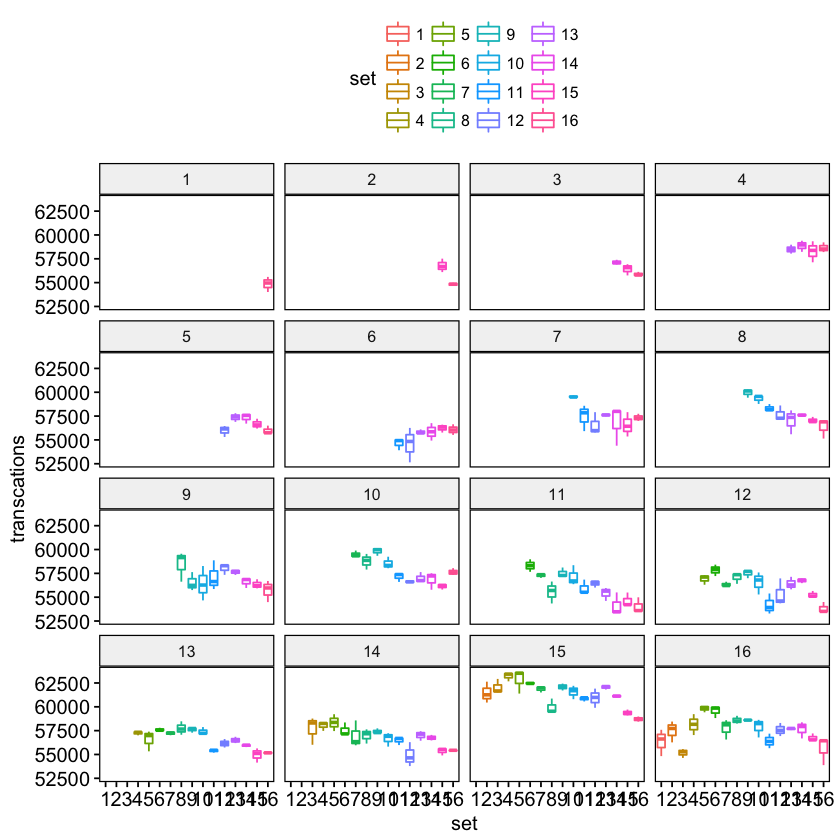

In [23]:
ggboxplot(samples, x = "set", y = "transactions", 
          color = "set", 
          ylab = "transcations", xlab = "set",facet.by='vmID')



In [ ]:
## TODO 16 to 1